# Car Price Prediction

### Importing required Libearies & Dataset

In [1]:
import pandas as pd , numpy as np , seaborn as sns , warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Abhi\Desktop\ML PROJECTS HOME\CarPrice.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Getting Deeper into Data

In [2]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Dealing with NaN values

In [7]:
df.isnull().sum()    # No null values present in data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Exploratory Data Analysis ( EDA )

In [8]:
data = pd.get_dummies(df)

In [9]:
data.shape

(205, 201)

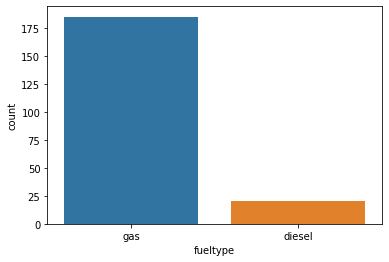

In [10]:
sns.countplot(df.fueltype)

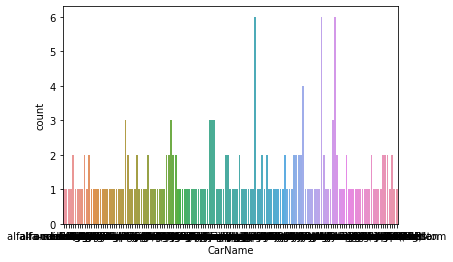

In [11]:
sns.countplot(df['CarName'])

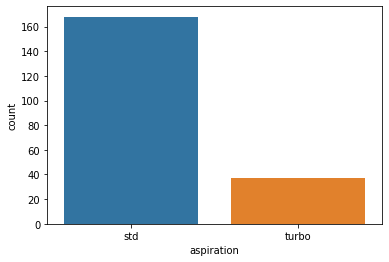

In [12]:
sns.countplot(df.aspiration)

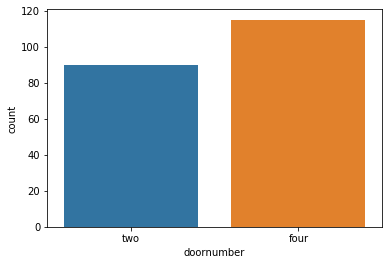

In [13]:
sns.countplot(df.doornumber)

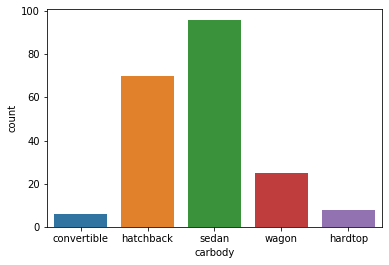

In [14]:
sns.countplot(df.carbody)

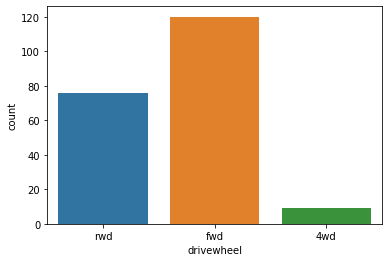

In [15]:
sns.countplot(df.drivewheel)

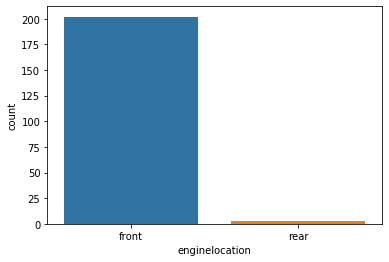

In [16]:
sns.countplot(df.enginelocation)

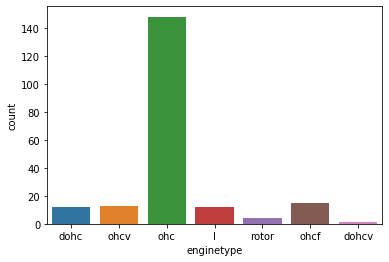

In [17]:
sns.countplot(df.enginetype)

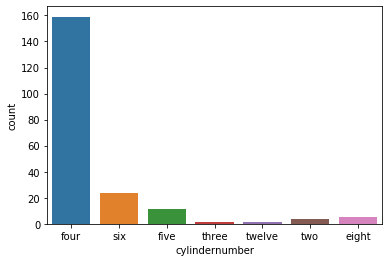

In [18]:
sns.countplot(df.cylindernumber)

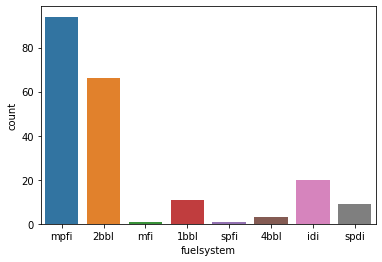

In [19]:
sns.countplot(df.fuelsystem)

## Feature Engineering & Feature Selection

In [20]:
dfn = df._get_numeric_data()

In [21]:
c= data.corr()    # Finding correlation

i = 0

# replacing diogonal corr() which is 1 to NaN for finding
#i.e manulating and get the informative features by removing high values of correlation.

while True:    
    try:
        c.iloc[i,i] = np.nan
        i += 1
    except:
        break

# Getting high corr. values w.r.t output because it supports the output...

features = c[(c['price'] > 0.8) | (c['price'] < -0.8)].dropna(how = 'all')['price']     
features_col = list(features.index)
print(features.shape, len(features_col))     # Exactly what i want....

(3,) 3


In [22]:
a = features_col + ['price']

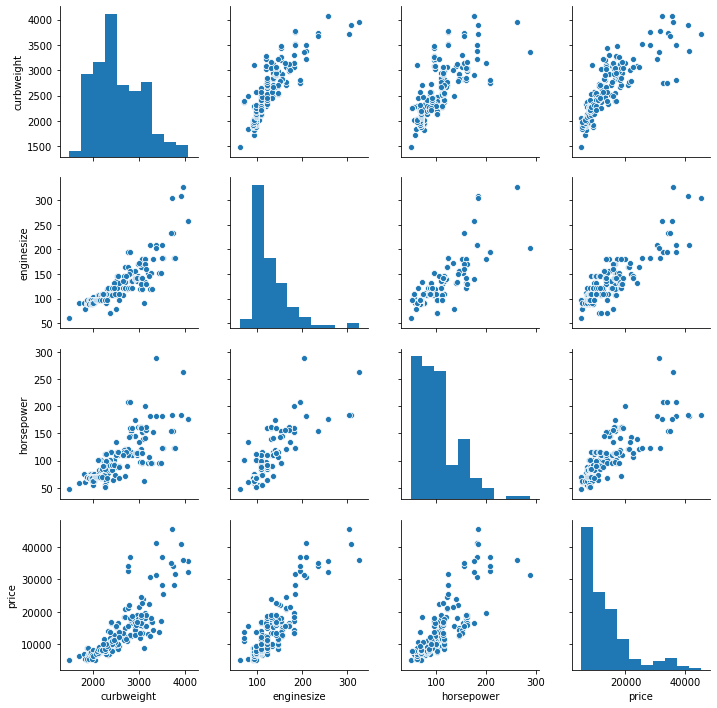

In [23]:
sns.pairplot(data[a])

In [24]:
data[a].corr()   # Also droping 'enginesize' column

,curbweight,enginesize,horsepower,price
curbweight,1.000000,0.850594,0.750739,0.835305
enginesize,0.850594,1.000000,0.809769,0.874145
horsepower,0.750739,0.809769,1.000000,0.808139
price,0.835305,0.874145,0.808139,1.000000


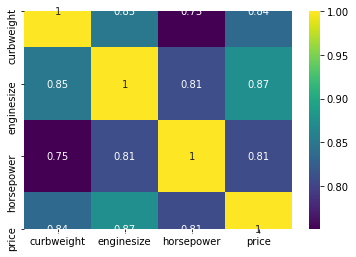

In [25]:
sns.heatmap(data[a].corr(),cmap = 'viridis',annot = True)

## Comparing Models

In [26]:
# Preparing  pipeline for all the models
# Here LinearRegression wins the race as its has highest r2_score...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR


X = data[['curbweight','horsepower']]
y = data.price

def model(X,y):
    models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
    for model in models:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(r2_score(y_test,y_pred) , type(model).__name__)
        
model(X,y)

0.7873704599018854 LinearRegression
0.8862912095455663 DecisionTreeRegressor
0.9302830570229408 RandomForestRegressor
0.8090319077442218 KNeighborsRegressor


## Here RandomForest Clearly Wins the race

# Building Final Model ( RandomForestClassifier )

In [32]:
X = data[['curbweight','horsepower']]
y = data.price
y = data.price
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

model = RandomForestRegressor()
        
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred) , type(model).__name__)

0.9432260461381144 RandomForestRegressor


In [33]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print(metrics.mean_squared_error(y_test,y_pred)) 
print(metrics.mean_absolute_error(y_test,y_pred))

1952.4190895803374
3811940.301357714
1285.560962179487


### Most Informative features for Predicting "Car Price" ( 2 features )

In [34]:
X.columns

Index(['curbweight', 'horsepower'], dtype='object')

In [35]:
len(X.columns)

2

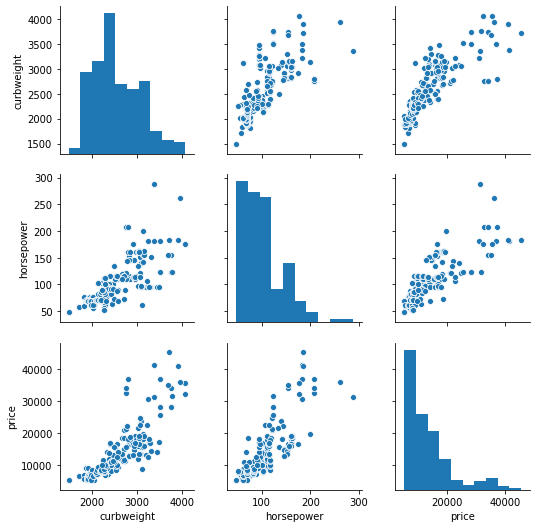

In [36]:
sns.pairplot(data[['curbweight', 'horsepower','price']])

# ...END...